<a href="https://colab.research.google.com/github/Ziad-o-Yusef/Deep-learning-notes/blob/main/7_Fashion_Mnist_with_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,Y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape,Y_test.shape

((10000, 28, 28), (10000,))

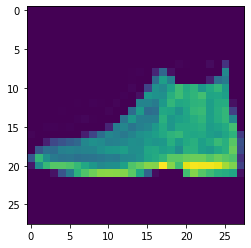

In [ ]:
plt.imshow(X_test[0])

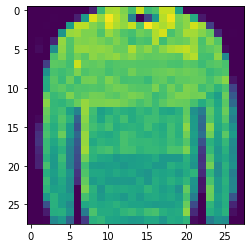

In [ ]:
plt.imshow(X_test[20])

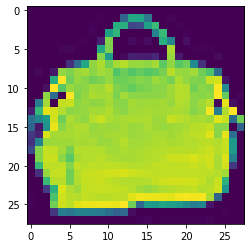

In [ ]:
plt.imshow(X_train[9085])

In [ ]:
Y_test = tf.keras.utils.to_categorical(Y_test,10)
Y_train = tf.keras.utils.to_categorical(Y_train,10)

In [ ]:
Y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
  ss = StandardScaler()
  X_test = X_test/255
  X_train = X_train/255

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential(
    [
        tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu',),
             tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
     
    ]
)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 100)              

In [ ]:
model.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))

Epoch 1/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.5127 - accuracy: 0.8128 - val_loss: 0.3997 - val_accuracy: 0.8570
Epoch 2/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3408 - accuracy: 0.8743 - val_loss: 0.3348 - val_accuracy: 0.8797
Epoch 3/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2978 - accuracy: 0.8901 - val_loss: 0.3215 - val_accuracy: 0.8876
Epoch 4/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2681 - accuracy: 0.8992 - val_loss: 0.3049 - val_accuracy: 0.8904
Epoch 5/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2468 - accuracy: 0.9081 - val_loss: 0.3034 - val_accuracy: 0.8861
Epoch 6/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2273 - accuracy: 0.9144 - val_loss: 0.2912 - val_accuracy: 0.8929
Epoch 7/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2098 - accuracy: 0.9209 - val_loss: 0.2807 -

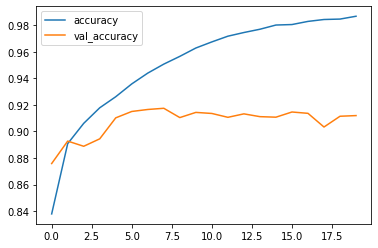

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()